# Narrative:

On 13 December 2022, 7:00am ET (U.S. Easter Time, NY Time), Moderna and Merck announced that mRNA-4157/V940, a cancer vaccine, demonstrated a statistically significant and clinically meaningful reduction in the risk of disease recurrence or death compared to KEYTRUDA monotherapy in stage III/IV melanoma patients. 

The regular trading hours for the U.S. stock market, which includes the Nasdaq Stock Market (Nasdaq) and the New York Stock Exchange (NYSE) are 9:30 a.m. to 4 p.m. Below, we see the recent traded stock price of Moderna Inc (MRNA, NASQAQ).

# Requirements:

Perform an event study on this corporate announcement on 13 December 2022. Use the testing framework:  240 prior trading days for estimation, and the 21 days for event window.SPX_Ret is the continuously compounded daily return rate on the S&P 500 Index. Use this to represent the U.S. market return. MRNA_Ret is the continuously compounded return rate of Moderna stock. (Ignore dividends in the computations.) 

# Conclusion
All p-value (except event day 0 and +1) fail to rej h0 that ar=0 at 5% level of sig. 
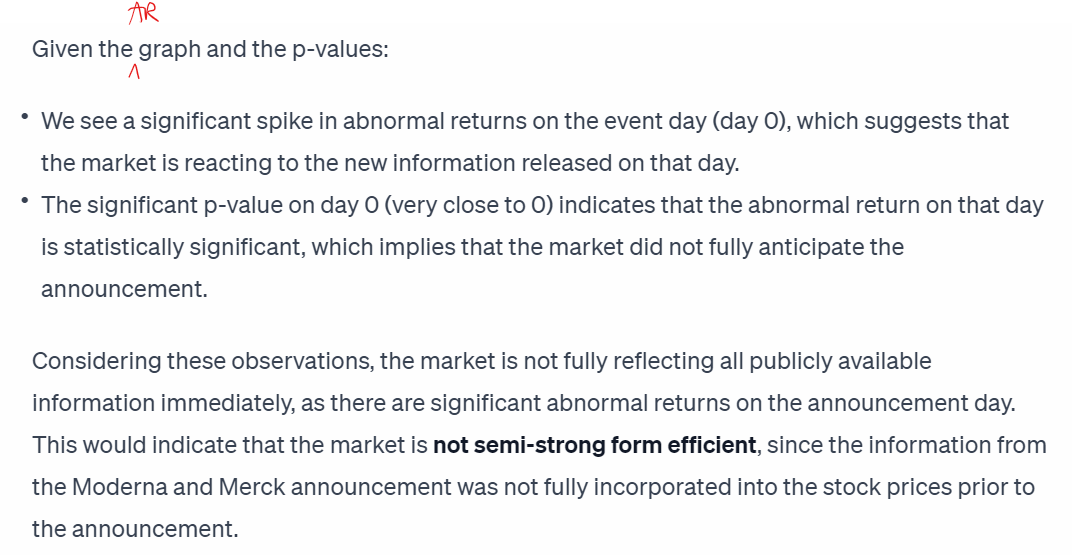

In [47]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [2]:
df = pd.read_csv('Moderna.csv') 
df

,Date,SPX_index,Moderna_Price,SPX_Ret,MRNA_Ret
0,1-Sep-21,"4,524.09",389.940002,NaN,NaN
1,2-Sep-21,"4,536.95",397.660004,0.002839,0.019604
2,3-Sep-21,"4,535.43",416.700012,-0.000335,0.046769
3,7-Sep-21,"4,520.03",436.390015,-0.003401,0.046170
4,8-Sep-21,"4,514.07",422.899994,-0.001319,-0.031401
...,...,...,...,...,...
339,6-Jan-23,"3,895.08",180.350006,0.022584,0.038664
340,9-Jan-23,"3,892.09",183.949997,-0.000768,0.019765
341,10-Jan-23,"3,919.25",189.649994,0.006954,0.030516
342,11-Jan-23,"3,969.61",186.639999,0.012768,-0.015999


In [9]:
df[df['Date']=='13-Dec-22']

,Date,SPX_index,Moderna_Price,SPX_Ret,MRNA_Ret
323,13-Dec-22,"4,019.65",197.539993,0.007263,0.179208


# important dates
- event date = index 323
- event window 10 days before (index 313 to 322 inclusive) and 10 days after the event date (index 324 to 333 inclusive)
- 240 days prior to event window, for estimation = index 73 to 312 inclusive

In [11]:
df2 = df.iloc[73:313,]
len(df2)

240

# 240 prior days

In [12]:
X2 = df2['SPX_Ret']
Y2 = df2['MRNA_Ret']
Z2 = sm.add_constant(X2)
model = sm.OLS(Y2, Z2).fit()
predictions = model.predict(Z2) 

results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:               MRNA_Ret   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     96.14
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           2.78e-19
Time:                        15:22:22   Log-Likelihood:                 452.17
No. Observations:                 240   AIC:                            -900.3
Df Residuals:                     238   BIC:                            -893.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.002     -0.381      0.7

In [15]:
C=model.params   ### C[0] gives intercept estimate; C[1] gives slope estimate

# 21 days event window

In [14]:
df3 = df.iloc[313:334,]
len(df3)

21

# Abnormal return (market model) due to corporate news

In [28]:
X3 = df3['SPX_Ret']
Y3 = df3['MRNA_Ret']

### Compute Abnormal Return AR
prediction = C[0] + C[1]*X3
AR = Y3 - prediction

C:\Users\adam chem\AppData\Local\Temp\ipykernel_22484\1112355585.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = C[0] + C[1]*X3


In [19]:
len(AR)

21

In [31]:
AR

313   -0.009445
314   -0.030026
315    0.033413
316    0.007525
317   -0.007238
318    0.009477
319    0.034745
320    0.020762
321   -0.028385
322   -0.092230
323    0.168976
324    0.066375
325    0.031449
326   -0.051646
327   -0.002960
328    0.056974
329    0.021469
330    0.015110
331   -0.053530
332   -0.092673
333   -0.001122
dtype: float64

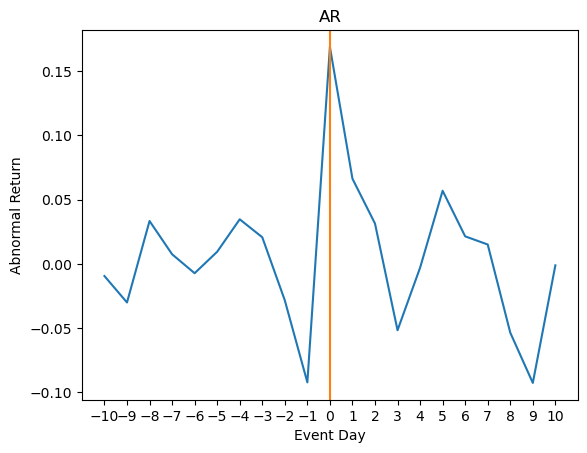

In [33]:
time = range(-10,11,1)  ### range(start, stop, step)

# plotting the points 
plt.plot(time, AR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8, +9,+10])

plt.plot((0, 0), (-1, 1), scaley = False)

plt.xlabel('Event Day')
plt.ylabel('Abnormal Return')
plt.title('AR')
plt.show()

# t-statistics of AR model
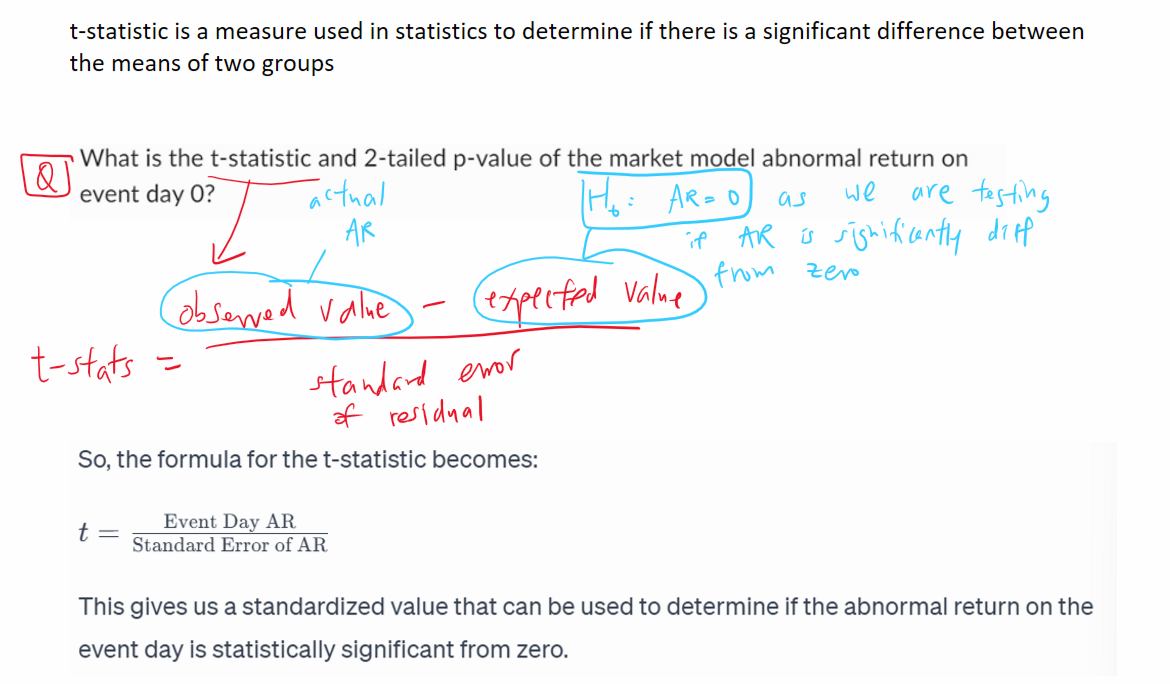

In [59]:
sigma=np.sqrt(model.mse_resid)
t_stat_AR=AR/sigma
print(t_stat_AR)

313   -0.255766
314   -0.813102
315    0.904829
316    0.203766
317   -0.196014
318    0.256632
319    0.940917
320    0.562236
321   -0.768664
322   -2.497625
323    4.575920
324    1.797441
325    0.851646
326   -1.398602
327   -0.080150
328    1.542874
329    0.581386
330    0.409180
331   -1.449613
332   -2.509622
333   -0.030392
dtype: float64


In [61]:
t_stat_AR.iloc[10,]

4.5759202057263995

# two-tail p-value of AR model
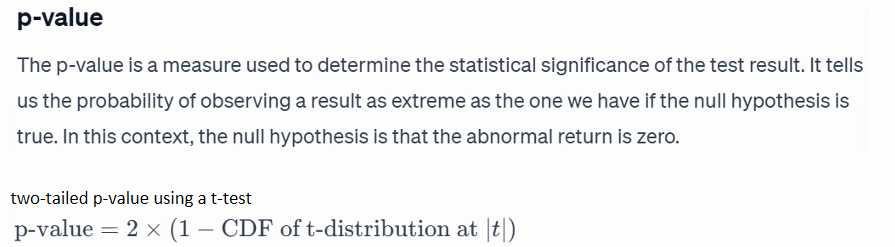

In [56]:
df = len(AR) - 1
p_value = 2 * stats.t.sf(np.abs(t_stat_AR), df)
p_value[10]

0.00018332946083896343

In [51]:
len(p_value)

21

In [57]:
p_value

array([8.00743699e-01, 4.25733638e-01, 3.76327197e-01, 8.40595247e-01,
       8.46576916e-01, 8.00084556e-01, 3.57974311e-01, 5.80202615e-01,
       4.51074944e-01, 2.13414728e-02, 1.83329461e-04, 8.73824321e-02,
       4.04492951e-01, 1.77248292e-01, 9.36914354e-01, 1.38536687e-01,
       5.67475909e-01, 6.86756541e-01, 1.62667115e-01, 2.08014468e-02,
       9.76055945e-01])

**all p-value (except event day 0 and +1) fail to rej h0 that ar=0 at 5% level of sig

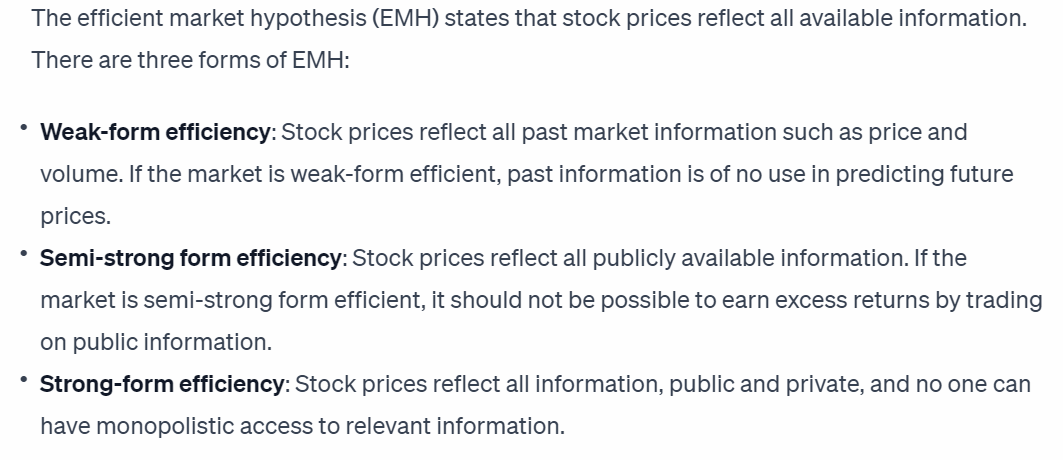

# Cum abnormal return (market model)  due to corporate news

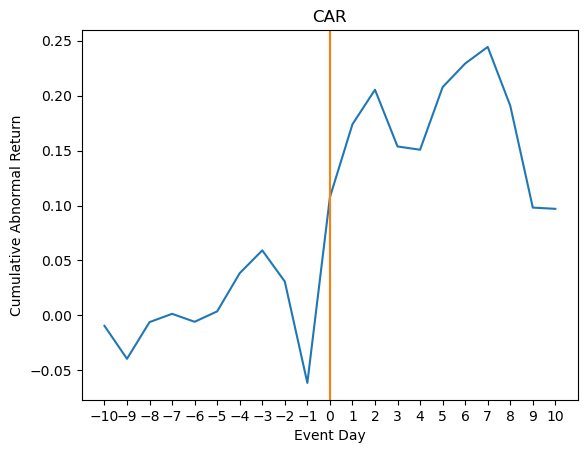

In [34]:
CAR = AR.cumsum()

time = list(range(-10,11,1))  ### range(start, stop, step)

plt.plot(time, CAR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])

plt.plot((0, 0), (-1, 1), scaley = False)

plt.xlabel('Event Day')
plt.ylabel('Cumulative Abnormal Return')
plt.title('CAR')
plt.show()

In [32]:
CAR

313   -0.009445
314   -0.039470
315   -0.006058
316    0.001467
317   -0.005771
318    0.003705
319    0.038451
320    0.059213
321    0.030828
322   -0.061402
323    0.107574
324    0.173948
325    0.205397
326    0.153751
327    0.150791
328    0.207765
329    0.229234
330    0.244344
331    0.190814
332    0.098140
333    0.097018
dtype: float64

# Market-adjusted abnormal return due to corporate news

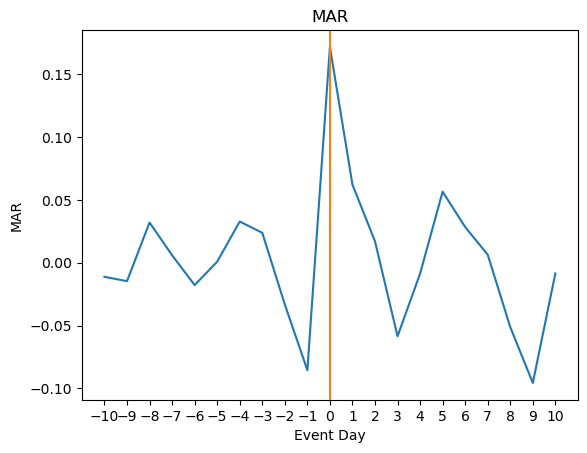

In [41]:
MAR=Y3-X3

time = list(range(-10,11,1))  ### range(start, stop, step)

plt.plot(time, MAR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])

plt.plot((0, 0), (-1, 1), scaley = False)

plt.xlabel('Event Day')
plt.ylabel('MAR')
plt.title('MAR')
plt.show()

# Mean-adjusted abnormal return due to corporate news

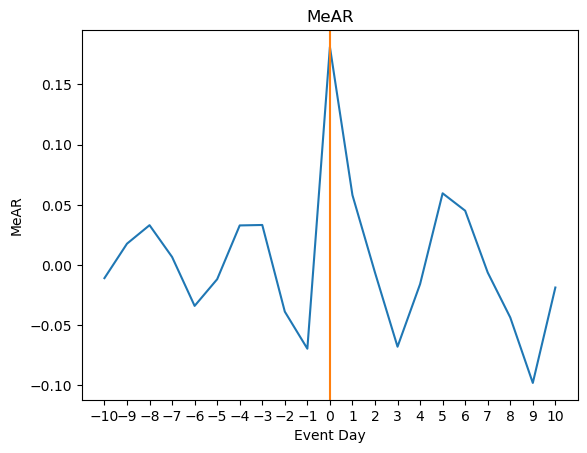

In [42]:
MeAR=Y3-np.mean(Y2)

time = list(range(-10,11,1))  ### range(start, stop, step)

plt.plot(time, MeAR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])

plt.plot((0, 0), (-1, 1), scaley = False)

plt.xlabel('Event Day')
plt.ylabel('MeAR')
plt.title('MeAR')
plt.show()

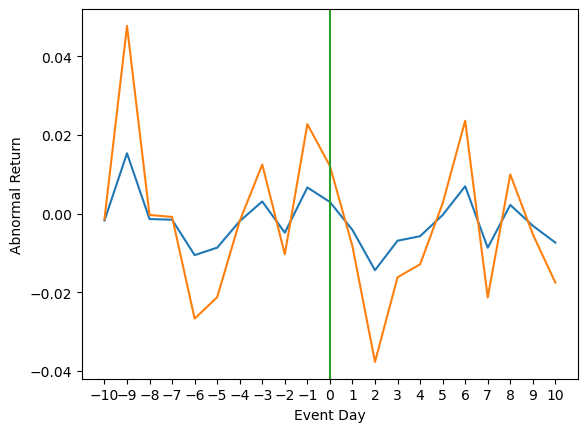

In [43]:
time = list(range(-10,11,1))  ### range(start, stop, step)

plt.plot(time, MAR-AR)
plt.plot(time, MeAR-AR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10])

plt.plot((0, 0), (-1, 1), scaley = False)

plt.xlabel('Event Day')
plt.ylabel('Abnormal Return')
plt.show()